# 영업이익과 당기순이익의 상태에 따라 투자했을 때의 기대수익 비교

In [10]:
# 데이터 준비

import pandas as pd

cols = ["기업", "연도", "현재_주가", "미래_주가", "영업이익_상태", "당기순이익_상태"]
data = pd.read_csv("data/재무제표_분석용데이터.csv", usecols=cols, encoding="euc-kr")

In [11]:
# 결측치는 제거
data.dropna(inplace=True)

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set()
%matplotlib inline
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

In [14]:
# 상태 변수 분포 확인

print(data["영업이익_상태"].value_counts(normalize=True))
print(data["당기순이익_상태"].value_counts(normalize=True))

# 두 컬럼 모두 흑자지속-적자지속-적자전환-흑자전환 순으로 빈도가 높음

흑자지속    0.656179
적자지속    0.145142
흑자전환    0.100817
적자전환    0.097862
Name: 영업이익_상태, dtype: float64
흑자지속    0.564401
적자지속    0.192856
흑자전환    0.122371
적자전환    0.120372
Name: 당기순이익_상태, dtype: float64


Text(0, 0.5, '수익률')

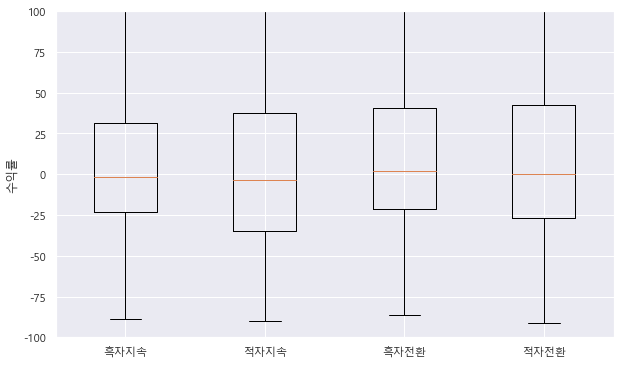

In [16]:
# 영업이익 상태에 따르 수익률 시각화

data["수익률"] = (data["미래_주가"]-data["현재_주가"]) / data["현재_주가"]*100

plt.figure(figsize=(10, 6))
graph_data = []

for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
    value = data.loc[data["영업이익_상태"]==state, "수익률"]
    graph_data.append(value)

plt.boxplot(graph_data)
plt.ylim(-100, 100)
plt.xticks([1, 2, 3, 4], ["흑자지속", "적자지속", "흑자전환", "적자전환"])
plt.ylabel("수익률")

# 흑자전환일 때 박스가 가장 높게 위치하고 적자지속일때 아랫쪽에 위치하나, 완벽하게 선형관계인것은 아님

Text(0, 0.5, '수익률')

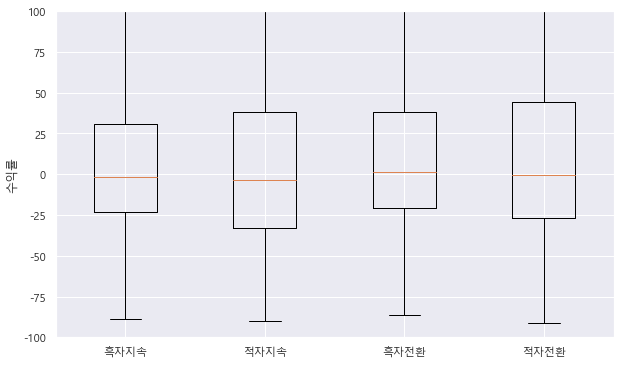

In [18]:
# 당기순이익 상태에 따르 수익률 시각화

plt.figure(figsize=(10, 6))
graph_data = []

for state in ["흑자지속", "적자지속", "흑자전환", "적자전환"]:
    value = data.loc[data["당기순이익_상태"]==state, "수익률"]
    graph_data.append(value)

plt.boxplot(graph_data)
plt.ylim(-100, 100)
plt.xticks([1, 2, 3, 4], ["흑자지속", "적자지속", "흑자전환", "적자전환"])
plt.ylabel("수익률")

# 영업이익-수익률 분포는 당기순이익-수익률 분포와 비슷함

In [20]:
# 상태에 따른 수익률 통계량

print(data.groupby(["영업이익_상태"])["수익률"].describe().round(2))

# 흑자 전환의 평균, 1, 3분위수, 중간값이 다른값보다 높으며, 특히 중간값이 양수인데 이는 투자하면 반 이상이 2.34%의 수익을 얻을 수 있다는 의미
# 적, 흑자를 가리지 않고 지속되는 경우보다 전환된 경우의 기대수익이 더 높음

          count   mean     std    min    25%   50%    75%      max
영업이익_상태                                                           
적자전환     1126.0  21.61   85.27 -91.53 -27.12  0.00  42.39   763.73
적자지속     1670.0  19.03  102.25 -89.87 -34.69 -3.30  37.42  1863.16
흑자전환     1160.0  26.87   98.92 -86.09 -21.23  2.08  40.41  1603.51
흑자지속     7550.0  15.16   69.86 -89.08 -23.23 -1.86  31.55  2202.02


In [21]:
print(data.groupby(["당기순이익_상태"])["수익률"].describe().round(2))

# 영업이익과 동일하지만 기대수익은 더 낮음

           count   mean     std    min    25%   50%    75%      max
당기순이익_상태                                                           
적자전환      1385.0  21.31   80.02 -91.53 -26.54 -0.62  44.03   579.64
적자지속      2219.0  20.07  105.24 -89.87 -32.85 -3.30  37.91  1863.16
흑자전환      1408.0  23.32   80.56 -86.09 -20.41  1.63  38.45  1066.29
흑자지속      6494.0  14.60   69.41 -89.08 -22.93 -1.87  30.74  2202.02
